
# Cleaning anomalies in time series per region slug



## Load  libraries

In [4]:
# %load first_cell.py
%reload_ext autoreload
%autoreload 2
from pathlib import Path
home = str(Path.home())

import sys
sys.path = sys.path + [f'{home}/.conda/envs/norm_env/lib/python37.zip', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/lib-dynload', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/site-packages']
sys.prefix = '/home/soniame/.conda/envs/norm_env'

from paths import RAW_PATH, TREAT_PATH, OUTPUT_PATH, FIGURES_PATH

In [5]:
import pandas as pd

#### Run single

In [ ]:
from src.runners.clean import _run_single 

In [ ]:
daily, weekly = _run_single(region_slug='aguascalientes', 
                            anomaly_vote_minimun_s1=1, 
                            anomaly_vote_minimun_s2=1, 
                            c_metric = 'max', 
                            print_report = False, 
                            print_plot = False)

In [ ]:
#daily[daily.date > '2020-05-19']

In [ ]:
import plotnine as p9
p9.theme_set(p9.theme_linedraw()) # default theme

In [ ]:
daily.head(3)
gg = (p9.ggplot(daily[daily.date > '2021-01-01'], p9.aes(x = 'date', y='tcp')) 
 + p9.geom_line(size= 1, alpha = .7)
 + p9.geom_line(p9.aes( y='tcp_clean'), color = 'red', size= 1, alpha = .7)
 + p9.theme(figure_size=(6, 3),
            axis_text_x=p9.element_text(size = 7)) )
gg 

In [ ]:
daily.head(3)
gg = (p9.ggplot(daily, p9.aes(x = 'date', y='tcp')) 
 + p9.geom_line(size= 1, alpha = .7)
 + p9.theme(figure_size=(6, 3),
            axis_text_x=p9.element_text(size = 7)) )
gg 

In [ ]:
weekly.head(3)
gg = (p9.ggplot(weekly[weekly.date_min > '2021-01-01'], p9.aes(x = 'date_min', y='tcp')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes( y='tcp_clean'), color = 'red')
 + p9.theme(figure_size=(6, 3),
            axis_text_x=p9.element_text(size = 7)) )
gg

In [ ]:
print(daily.date.min())
print(daily.date.max())
print(weekly.week.max())

#### Run by batch

Running by batch

In [10]:
from src.runners.clean import _run_batch 

../src/utils.py:159: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


In [11]:
_run_batch(athena_path = "/home/soniame/shared/spd-sdv-omitnik-waze/corona", 
          c_metric = 'max',
          f_metric = 20,
          version = 'dev')

2021-07-05 13:39:01.966 | INFO     | src.runners.clean:_run_batch:958 - TO DO regions  78
2021-07-05 13:39:01.967 | INFO     | src.runners.clean:_run_single:883 - ... here we go aguascalientes...

2021-07-05 13:39:01.970 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('aguascalientes')
        
2021-07-05 13:39:04.622 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.0273899198125596
2021-07-05 13:39:04.639 | DEBUG    | src.runners.clean:_c_param:348 - C max: 20.547798396251192
2021-07-05 13:39:04.643 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-07-05 13:39:04.643 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-07-05 13:39:04.644 | DEBUG    | src.runners.clean:_find_anomalies:191 -

2021-07-05 13:39:11.989 | INFO     | src.runners.clean:_run_single:883 - ... here we go arequipa...

2021-07-05 13:39:11.990 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('arequipa')
        
2021-07-05 13:39:14.584 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.3707797834677795
2021-07-05 13:39:14.603 | DEBUG    | src.runners.clean:_c_param:348 - C max: 27.41559566935559
2021-07-05 13:39:14.607 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-07-05 13:39:14.608 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-07-05 13:39:14.608 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 13:39:14.610 | DEBUG    | src.runners.clean:_validate_series:55 -

2021-07-05 13:39:18.328 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_arequipa.pdf
2021-07-05 13:39:19.901 | INFO     | src.runners.clean:_run_single:938 - ... arequipa done ...

2021-07-05 13:39:19.903 | INFO     | src.runners.clean:_run_single:883 - ... here we go barranquilla...

2021-07-05 13:39:19.904 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('barranquilla')
        
2021-07-05 13:39:22.713 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.76668667025904
2021-07-05 13:39:22.7

2021-07-05 13:39:24.754 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 13:39:24.754 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 13:39:24.806 | DEBUG    | src.runners.clean:_run_step:865 - ... step done ...
2021-07-05 13:39:26.032 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-07-05 13:39:26.350 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/env

2021-07-05 13:39:32.695 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 13:39:32.700 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 13:39:32.701 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 13:39:32.751 | DEBUG    | src.runners.clean:_run_step:865 - ... step done ...
2021-07-05 13:39:34.984 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-07-05 13:39:35.303 | DEBUG

2021-07-05 13:39:43.346 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-07-05 13:39:43.633 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_belohorizonte.pdf
2021-07-05 13:39:45.120 | INFO     | src.runners.clean:_run_single:938 - ... belohorizonte done ...

2021-07-05 13:39:45.122 | INFO     | src.runners.clean:_run_single:883 - ... here we go bogota...

2021-07-05 13:39:45.123 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('bogota')
        
2021-07-05 13:39:48

2021-07-05 13:39:52.808 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_bogota.pdf
2021-07-05 13:39:54.343 | INFO     | src.runners.clean:_run_single:938 - ... bogota done ...

2021-07-05 13:39:54.344 | INFO     | src.runners.clean:_run_single:883 - ... here we go brasilia...

2021-07-05 13:39:54.345 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('brasilia')
        
2021-07-05 13:39:57.790 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.045577611833902
2021-07-05 13:39:57.828 | DEBUG 

2021-07-05 13:40:04.171 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('bucaramanga')
        
2021-07-05 13:40:07.002 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.6872269818077374
2021-07-05 13:40:07.019 | DEBUG    | src.runners.clean:_c_param:348 - C max: 33.74453963615475
2021-07-05 13:40:07.023 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-07-05 13:40:07.024 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-07-05 13:40:07.025 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 13:40:07.028 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 13:40:07.032 | DEBUG    | src.runners.clean:_c_trun:121 - 

2021-07-05 13:40:10.361 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-07-05 13:40:10.648 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_bucaramanga.pdf
2021-07-05 13:40:12.298 | INFO     | src.runners.clean:_run_single:938 - ... bucaramanga done ...

2021-07-05 13:40:12.303 | INFO     | src.runners.clean:_run_single:883 - ... here we go buenosaires...

2021-07-05 13:40:12.306 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('buenosaires')
        
2021-07-05 13

/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_buenosaires.pdf
2021-07-05 13:40:21.050 | INFO     | src.runners.clean:_run_single:938 - ... buenosaires done ...

2021-07-05 13:40:21.052 | INFO     | src.runners.clean:_run_single:883 - ... here we go cali...

2021-07-05 13:40:21.055 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('cali')
        
2021-07-05 13:40:22.674 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.4587580136087392
2021-07-05 13:40:22.694 | DEBUG    | src.runners.clean:_c_param:348 - C max: 29.175160272174786
2021-07-05 13:40:22.698 | DEBUG    | src

2021-07-05 13:40:25.943 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-07-05 13:40:26.224 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_cali.pdf
2021-07-05 13:40:27.801 | INFO     | src.runners.clean:_run_single:938 - ... cali done ...

2021-07-05 13:40:27.803 | INFO     | src.runners.clean:_run_single:883 - ... here we go campinas...

2021-07-05 13:40:27.803 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('campinas')
        
2021-07-05 13:40:30.893 | DEBUG  

2021-07-05 13:40:36.184 | INFO     | src.runners.clean:_run_single:883 - ... here we go cartagena...

2021-07-05 13:40:36.185 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('cartagena')
        
2021-07-05 13:40:37.814 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.5510305787633392
2021-07-05 13:40:37.832 | DEBUG    | src.runners.clean:_c_param:348 - C max: 31.020611575266784
2021-07-05 13:40:37.835 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-07-05 13:40:37.836 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-07-05 13:40:37.836 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 13:40:37.838 | DEBUG    | src.runners.clean:_validate_series:5

2021-07-05 13:40:43.203 | INFO     | src.runners.clean:_run_single:938 - ... cartagena done ...

2021-07-05 13:40:43.205 | INFO     | src.runners.clean:_run_single:883 - ... here we go country_argentina...

2021-07-05 13:40:43.206 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('country_argentina')
        
2021-07-05 13:40:46.209 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.2809406370453256
2021-07-05 13:40:46.225 | DEBUG    | src.runners.clean:_c_param:348 - C max: 25.618812740906513
2021-07-05 13:40:46.229 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-07-05 13:40:46.230 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-07-05 13:40:46.230 | DEBUG    | src.runners.clean:_find_an

2021-07-05 13:40:49.595 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-07-05 13:40:49.914 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_country_argentina.pdf
2021-07-05 13:40:51.480 | INFO     | src.runners.clean:_run_single:938 - ... country_argentina done ...

2021-07-05 13:40:51.482 | INFO     | src.runners.clean:_run_single:883 - ... here we go country_barbados...

2021-07-05 13:40:51.485 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('country_barbados')


/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_country_barbados.pdf
2021-07-05 13:40:57.886 | INFO     | src.runners.clean:_run_single:938 - ... country_barbados done ...

2021-07-05 13:40:57.888 | INFO     | src.runners.clean:_run_single:883 - ... here we go country_brazil...

2021-07-05 13:40:57.888 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('country_brazil')
        
2021-07-05 13:41:00.686 | DEBUG    | src.runners.clean:_c_param:348 - C max: 0.9157720181113406
2021-07-05 13:41:00.703 | DEBUG    | src.runners.clean:_c_param:348 - C max: 18.315440362226813
2021-07-05

2021-07-05 13:41:05.195 | INFO     | src.runners.clean:_run_single:883 - ... here we go country_chile...

2021-07-05 13:41:05.195 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('country_chile')
        
2021-07-05 13:41:08.555 | DEBUG    | src.runners.clean:_c_param:348 - C max: 4.142744523852838
2021-07-05 13:41:08.574 | DEBUG    | src.runners.clean:_c_param:348 - C max: 82.85489047705676
2021-07-05 13:41:08.578 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-07-05 13:41:08.579 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-07-05 13:41:08.579 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 13:41:08.581 | DEBUG    | src.runners.clean:_validate_se

2021-07-05 13:41:16.377 | DEBUG    | src.runners.clean:_c_param:348 - C max: 33.831489848875115
2021-07-05 13:41:16.381 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-07-05 13:41:16.381 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-07-05 13:41:16.382 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 13:41:16.383 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 13:41:16.389 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.691574492443756
2021-07-05 13:41:16.390 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.691574492443756
2021-07-05 13:41:16.410 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:85 - !! No Seasonal !!
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

2021-07-05 13:41:23.899 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.6067585208477897
2021-07-05 13:41:23.927 | DEBUG    | src.runners.clean:_c_param:348 - C max: 32.135170416955795
2021-07-05 13:41:23.930 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-07-05 13:41:23.931 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-07-05 13:41:23.932 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 13:41:23.933 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 13:41:23.939 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.6067585208477897
2021-07-05 13:41:23.939 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.6067585208477897
2021-07-05 13:41:23.960 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:85 - !! No Seasonal !!
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

2021-07-05 13:41:31.382 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.3351452315716383
2021-07-05 13:41:31.400 | DEBUG    | src.runners.clean:_c_param:348 - C max: 26.702904631432766
2021-07-05 13:41:31.404 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-07-05 13:41:31.404 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-07-05 13:41:31.405 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 13:41:31.406 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 13:41:31.412 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 13:41:31.412 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
2021-07-05 13:41:31.433 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:85 - !! No Seasonal !!
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

2021-07-05 13:41:32.672 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 13:41:32.674 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 13:41:32.677 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 13:41:32.682 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:41:32.683 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 26.702904631432766
2021-07-05 13:41:33.206 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 13:41:33.207 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 13:41:33.208 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 13:41:33.442 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 13:41:33.446 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 13:41:33

2021-07-05 13:41:40.438 | INFO     | src.runners.clean:_run_step:832 - Output variable S2_shift
2021-07-05 13:41:40.438 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 13:41:40.439 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 13:41:40.441 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 13:41:40.446 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:41:40.447 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 40.356983580188
2021-07-05 13:41:40.970 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 13:41:40.971 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 13:41:40.971 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 13:41:41.210 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT

2021-07-05 13:41:48.533 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-08-23 00:00:00'), Timestamp('2021-02-28 00:00:00'), Timestamp('2021-03-07 00:00:00'), Timestamp('2021-03-14 00:00:00'), Timestamp('2021-03-21 00:00:00'), Timestamp('2021-03-28 00:00:00'), Timestamp('2021-04-03 00:00:00'), Timestamp('2021-04-04 00:00:00'), Timestamp('2021-04-11 00:00:00'), Timestamp('2021-04-18 00:00:00'), Timestamp('2021-04-25 00:00:00'), Timestamp('2021-05-02 00:00:00'), Timestamp('2021-05-09 00:00:00'), Timestamp('2021-05-16 00:00:00'), Timestamp('2021-05-23 00:00:00'), Timestamp('2021-05-30 00:00:00'), Timestamp('2021-06-13 00:00:00'), Timestamp('2021-06-20 00:00:00'), Timestamp('2021-06-27 00:00:00')]
2021-07-05 13:41:48.535 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 13:41:48.619 | INFO     | src.runners.clean:_run_step:832 - Output variable S2_shift
2021-07-05 13:41:48.619 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 13:41:56.001 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-06-07 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-04-04 00:00:00'), Timestamp('2021-04-11 00:00:00'), Timestamp('2021-05-09 00:00:00'), Timestamp('2021-06-13 00:00:00'), Timestamp('2021-06-20 00:00:00')]
2021-07-05 13:41:56.003 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 13:41:56.087 | INFO     | src.runners.clean:_run_step:832 - Output variable S2_shift
2021-07-05 13:41:56.088 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 13:41:56.089 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 13:41:56.091 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 13:41:56.096 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:41:56.097 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 26

2021-07-05 13:42:03.717 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 13:42:03.717 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 13:42:03.719 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 13:42:03.725 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:42:03.726 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 60.0
2021-07-05 13:42:04.240 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 13:42:04.241 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 13:42:04.241 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 13:42:04.475 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 13:42:04.480 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 13:42:04.481 | DEBUG  

2021-07-05 13:42:10.368 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 43.94790467313443
2021-07-05 13:42:10.888 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 13:42:10.889 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 13:42:10.890 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 13:42:11.129 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 13:42:11.134 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 13:42:11.135 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is tryi

2021-07-05 13:42:20.107 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 13:42:20.108 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 13:42:20.155 | DEBUG    | src.runners.clean:_run_step:865 - ... step done ...
2021-07-05 13:42:22.397 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-07-05 13:42:22.676 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/env

2021-07-05 13:42:28.862 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 13:42:29.100 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 13:42:29.104 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 13:42:29.106 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 13:42:29.155 | DEBUG    | src.runners.clean:_run_step:865 - ... step done ...
2021-07-05 13:42:31.422 | DEBUG

2021-07-05 13:42:35.898 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 13:42:35.980 | INFO     | src.runners.clean:_run_step:832 - Output variable S2_shift
2021-07-05 13:42:35.981 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 13:42:35.982 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 13:42:35.984 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 13:42:35.989 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:42:35.990 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 33.35152296557669
2021-07-05 13:42:36.502 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 13:42:36.503 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 13:42:36.504 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start Non

2021-07-05 13:42:42.482 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2021-01-17 00:00:00'), Timestamp('2021-01-31 00:00:00'), Timestamp('2021-03-14 00:00:00'), Timestamp('2021-03-28 00:00:00'), Timestamp('2021-04-04 00:00:00'), Timestamp('2021-05-23 00:00:00'), Timestamp('2021-05-30 00:00:00')]
2021-07-05 13:42:42.484 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 13:42:42.568 | INFO     | src.runners.clean:_run_step:832 - Output variable S2_shift
2021-07-05 13:42:42.568 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 13:42:42.569 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 13:42:42.572 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 13:42:42.577 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:42:42.578 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 37

2021-07-05 13:42:51.023 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 13:42:51.108 | INFO     | src.runners.clean:_run_step:832 - Output variable S2_shift
2021-07-05 13:42:51.109 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 13:42:51.109 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 13:42:51.111 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 13:42:51.116 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:42:51.117 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 21.38017152314131
2021-07-05 13:42:51.632 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 13:42:51.633 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 13:42:51.634 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start Non

2021-07-05 13:42:57.712 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 13:42:57.718 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:42:57.718 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 60.0
2021-07-05 13:42:58.238 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 13:42:58.239 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 13:42:58.240 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 13:42:58.473 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 13:42:58.478 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 13:42:58.478 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

2021-07-05 13:43:05.457 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-25 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-28 00:00:00'), Timestamp('2020-08-29 00:00:00'), Timestamp('2021-03-21 00:00:00'), Timestamp('2021-03-26 00:00:00'), Timestamp('2021-04-18 00:00:00'), Timestamp('2021-04-30 00:00:00')]
2021-07-05 13:43:05.460 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 13:43:05.565 | INFO     | src.runners.clean:_run_step:832 - Output variable S2_shift
2021-07-05 13:43:05.566 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 13:43:05.569 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 13:43:05.570 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 13:43:05.575 | 

2021-07-05 13:43:13.591 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2021-04-04 00:00:00'), Timestamp('2021-06-26 00:00:00')]
2021-07-05 13:43:13.593 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 13:43:13.701 | INFO     | src.runners.clean:_run_step:832 - Output variable S2_shift
2021-07-05 13:43:13.702 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 13:43:13.703 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 13:43:13.705 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 13:43:13.711 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:43:13.711 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 62.029820535966365
2021-07-05 13:43:14.236 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 13:43:14.237 | DEBUG    | src.runners.cle

2021-07-05 13:43:21.787 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 13:43:21.792 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:43:21.792 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 11.060324475836973
2021-07-05 13:43:22.308 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 13:43:22.309 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 13:43:22.310 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 13:43:22.545 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 13:43:22.550 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 13:43:22.551 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

2021-07-05 13:43:30.200 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 13:43:30.433 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 13:43:30.439 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 13:43:30.439 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 13:43:30.489 | DEBUG    | src.runners.clean:_run_step:865 - ... step done ...
2021-07-05 13:43:32.765 | DEBUG

2021-07-05 13:43:41.686 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-07-05 13:43:41.963 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_goiania.pdf
2021-07-05 13:43:43.510 | INFO     | src.runners.clean:_run_single:938 - ... goiania done ...

2021-07-05 13:43:43.512 | INFO     | src.runners.clean:_run_single:883 - ... here we go guadalajara...

2021-07-05 13:43:43.513 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('guadalajara')
        
2021-07-05 13:43:46.6

2021-07-05 13:43:50.982 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-07-05 13:43:51.310 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_guadalajara.pdf
2021-07-05 13:43:52.988 | INFO     | src.runners.clean:_run_single:938 - ... guadalajara done ...

2021-07-05 13:43:52.989 | INFO     | src.runners.clean:_run_single:883 - ... here we go guatemala...

2021-07-05 13:43:52.992 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('guatemala')
        
2021-07-05 13:43:

2021-07-05 13:44:00.317 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_guatemala.pdf
2021-07-05 13:44:01.899 | INFO     | src.runners.clean:_run_single:938 - ... guatemala done ...

2021-07-05 13:44:01.901 | INFO     | src.runners.clean:_run_single:883 - ... here we go guayaquil...

2021-07-05 13:44:01.901 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('guayaquil')
        
2021-07-05 13:44:04.766 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.0869959841260328
2021-07-05 13:44:04.788

2021-07-05 13:44:07.985 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-07-05 13:44:08.266 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_guayaquil.pdf
2021-07-05 13:44:09.792 | INFO     | src.runners.clean:_run_single:938 - ... guayaquil done ...

2021-07-05 13:44:09.794 | INFO     | src.runners.clean:_run_single:883 - ... here we go joaopessoa...

2021-07-05 13:44:09.797 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('joaopessoa')
        
2021-07-05 13:44:12

2021-07-05 13:44:18.974 | INFO     | src.runners.clean:_run_single:883 - ... here we go kingston...

2021-07-05 13:44:18.977 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('kingston')
        
2021-07-05 13:44:20.512 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.4675734225846222
2021-07-05 13:44:20.531 | DEBUG    | src.runners.clean:_c_param:348 - C max: 29.351468451692444
2021-07-05 13:44:20.535 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-07-05 13:44:20.535 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-07-05 13:44:20.536 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 13:44:20.537 | DEBUG    | src.runners.clean:_validate_series:55 

2021-07-05 13:44:29.467 | DEBUG    | src.runners.clean:_c_param:348 - C max: 13.424126289442615
2021-07-05 13:44:29.471 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-07-05 13:44:29.471 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-07-05 13:44:29.473 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 13:44:29.475 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 13:44:29.480 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 13:44:29.480 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
2021-07-05 13:44:29.500 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:85 - !! No Seasonal !!
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

2021-07-05 13:44:37.856 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 13:44:37.857 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
2021-07-05 13:44:37.877 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:85 - !! No Seasonal !!
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 13:44:37.942 | DEBUG    | src.runners.clean:_find_anomalies:205 - Number of anomalies found: 30

2021-07-05 13:44:37.942 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-

2021-07-05 13:44:44.120 | INFO     | src.runners.clean:_run_single:883 - ... here we go maceio...

2021-07-05 13:44:44.121 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('maceio')
        
2021-07-05 13:44:46.778 | DEBUG    | src.runners.clean:_c_param:348 - C max: 0.6694820447662065
2021-07-05 13:44:46.808 | DEBUG    | src.runners.clean:_c_param:348 - C max: 13.389640895324131
2021-07-05 13:44:46.812 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-07-05 13:44:46.813 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-07-05 13:44:46.813 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 13:44:46.814 | DEBUG    | src.runners.clean:_validate_series:55 - ..

2021-07-05 13:44:54.718 | DEBUG    | src.runners.clean:_c_param:348 - C max: 2.3062522483739114
2021-07-05 13:44:54.738 | DEBUG    | src.runners.clean:_c_param:348 - C max: 46.12504496747823
2021-07-05 13:44:54.742 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-07-05 13:44:54.743 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-07-05 13:44:54.743 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 13:44:54.745 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 13:44:54.750 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 2.3062522483739114
2021-07-05 13:44:54.751 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 2.3062522483739114
2021-07-05 13:44:54.771 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:85 - !! No Seasonal !!
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

2021-07-05 13:44:57.953 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-07-05 13:44:58.232 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_managua.pdf
2021-07-05 13:44:59.713 | INFO     | src.runners.clean:_run_single:938 - ... managua done ...

2021-07-05 13:44:59.715 | INFO     | src.runners.clean:_run_single:883 - ... here we go manaus...

2021-07-05 13:44:59.715 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('manaus')
        
2021-07-05 13:45:02.431 | DEBUG

2021-07-05 13:45:05.775 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-07-05 13:45:06.091 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_manaus.pdf
2021-07-05 13:45:07.571 | INFO     | src.runners.clean:_run_single:938 - ... manaus done ...

2021-07-05 13:45:07.573 | INFO     | src.runners.clean:_run_single:883 - ... here we go medellin...

2021-07-05 13:45:07.573 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('medellin')
        
2021-07-05 13:45:10.320 | DEB

2021-07-05 13:45:12.354 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 13:45:12.354 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 13:45:12.405 | DEBUG    | src.runners.clean:_run_step:865 - ... step done ...
2021-07-05 13:45:14.666 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-07-05 13:45:14.983 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/env

2021-07-05 13:45:22.458 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-07-05 13:45:22.735 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_merida.pdf
2021-07-05 13:45:24.599 | INFO     | src.runners.clean:_run_single:938 - ... merida done ...

2021-07-05 13:45:24.601 | INFO     | src.runners.clean:_run_single:883 - ... here we go mexicocity...

2021-07-05 13:45:24.602 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('mexicocity')
        
2021-07-05 13:45:28.658 |

2021-07-05 13:45:34.794 | INFO     | src.runners.clean:_run_single:938 - ... mexicocity done ...

2021-07-05 13:45:34.796 | INFO     | src.runners.clean:_run_single:883 - ... here we go monterrey...

2021-07-05 13:45:34.797 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('monterrey')
        
2021-07-05 13:45:37.654 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.0541138630388942
2021-07-05 13:45:37.671 | DEBUG    | src.runners.clean:_c_param:348 - C max: 21.082277260777886
2021-07-05 13:45:37.674 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-07-05 13:45:37.675 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-07-05 13:45:37.677 | DEBUG    | src.runners.clean:_find_anomalies:191 - 


2021-07-05 13:45:45.609 | DEBUG    | src.runners.clean:_c_param:348 - C max: 0.8200260736553959
2021-07-05 13:45:45.626 | DEBUG    | src.runners.clean:_c_param:348 - C max: 16.40052147310792
2021-07-05 13:45:45.630 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-07-05 13:45:45.631 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-07-05 13:45:45.632 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 13:45:45.634 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 13:45:45.639 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 13:45:45.640 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
2021-07-05 13:45:45.660 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:85 - !! No Seasonal !!
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

2021-07-05 13:45:53.402 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-07-05 13:45:53.403 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-07-05 13:45:53.404 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 13:45:53.407 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 13:45:53.412 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 13:45:53.412 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
2021-07-05 13:45:53.433 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:85 - !! No Seasonal !!
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is 

2021-07-05 13:46:01.227 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:85 - !! No Seasonal !!
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 13:46:01.292 | DEBUG    | src.runners.clean:_find_anomalies:205 - Number of anomalies found: 18

2021-07-05 13:46:01.293 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2021-02-07 00:00:00'), Timestamp('2021-02-14 00:00:00'), Timestamp('2021-02-19 00:00:00'), Timestamp('2021-02-21 00:00:00'), Timestamp('2021-02-28 00:00:00'), Timestamp('2021-03-07 00:

2021-07-05 13:46:07.772 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-07-05 13:46:07.774 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 13:46:07.776 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 13:46:07.780 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 13:46:07.781 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
2021-07-05 13:46:07.801 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:85 - !! No Seasonal !!
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

2021-07-05 13:46:16.305 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-07-05 13:46:16.305 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 13:46:16.307 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 13:46:16.312 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 13:46:16.313 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
2021-07-05 13:46:16.334 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:85 - !! No Seasonal !!
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 13:46:25.529 | DEBUG    | src.runners.clean:_find_anomalies:205 - Number of anomalies found: 2

2021-07-05 13:46:25.530 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-25 00:00:00')]
2021-07-05 13:46:25.532 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 13:46:25.643 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-07-05 13:46:25.644 |

2021-07-05 13:46:34.428 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-07-10 00:00:00'), Timestamp('2020-08-29 00:00:00'), Timestamp('2021-06-19 00:00:00')]
2021-07-05 13:46:34.430 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 13:46:34.515 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-07-05 13:46:34.516 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 13:46:34.517 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 13:46:34.519 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 13:46:34.524 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:46:34.525 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 20.434044013155244
2021-07-05 13:46:35.042 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 13:46:3

2021-07-05 13:46:42.780 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 13:46:42.865 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-07-05 13:46:42.866 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 13:46:42.867 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 13:46:42.869 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 13:46:42.875 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:46:42.876 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 28.04191290400069
2021-07-05 13:46:43.390 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 13:46:43.391 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 13:46:43.392 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start Non

2021-07-05 13:46:51.735 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-07-05 13:46:51.736 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 13:46:51.738 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 13:46:51.740 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 13:46:51.746 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:46:51.747 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 14.553427292382654
2021-07-05 13:46:52.271 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 13:46:52.272 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 13:46:52.275 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 13:46:52.536 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at 

2021-07-05 13:47:00.575 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:47:00.575 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 14.102130431924504
2021-07-05 13:47:01.096 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 13:47:01.098 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 13:47:01.101 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 13:47:01.332 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 13:47:01.337 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 13:47:01.338 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

2021-07-05 13:47:09.351 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 13:47:09.353 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 13:47:09.358 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:47:09.359 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 32.601276485710144
2021-07-05 13:47:09.871 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 13:47:09.873 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 13:47:09.873 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 13:47:10.107 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 13:47:10.111 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 13:47:10.111 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src

2021-07-05 13:47:18.338 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:47:18.338 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 15.141847888610931
2021-07-05 13:47:18.849 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 13:47:18.850 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 13:47:18.851 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 13:47:19.086 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 13:47:19.091 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 13:47:19.092 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

2021-07-05 13:47:27.459 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 13:47:27.465 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:47:27.465 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 29.44421398287671
2021-07-05 13:47:27.984 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 13:47:27.985 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 13:47:27.985 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 13:47:28.220 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 13:47:28.225 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 13:47:28.226 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

2021-07-05 13:47:35.125 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 13:47:35.127 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 13:47:35.133 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:47:35.133 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 33.10849709119505
2021-07-05 13:47:35.647 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 13:47:35.648 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 13:47:35.649 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 13:47:35.886 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 13:47:35.891 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 13:47:35.892 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/

2021-07-05 13:47:43.831 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 13:47:43.918 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-07-05 13:47:43.919 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 13:47:43.920 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 13:47:43.922 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 13:47:43.927 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:47:43.928 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 29.02482263239345
2021-07-05 13:47:44.441 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 13:47:44.443 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 13:47:44.443 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start Non

2021-07-05 13:47:52.395 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-11-25 00:00:00'), Timestamp('2020-12-06 00:00:00'), Timestamp('2020-12-09 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-01-22 00:00:00'), Timestamp('2021-01-27 00:00:00'), Timestamp('2021-02-14 00:00:00'), Timestamp('2021-02-15 00:00:00'), Timestamp('2021-02-16 00:00:00'), Timestamp('2021-03-07 00:00:00'), Timestamp('2021-03-14 00:00:00'), Timestamp('2021-03-21 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-04-23 00:00:00'), Timestamp('2021-04-25 00:00:00'), Timestamp('2021-05-23 00:00:00'), Timestamp('2021-05-30 00:00:00'), Timestamp('2021-06-03 00:00:00'), Timestamp('2021-06-06 00:00:00'), Timestamp('2021-06-13 00:00:00'), Timestamp('2021-06-21 00:00:00')]
2021-07-05 13:47:52.397 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 13:47:52.481 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-0

../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 13:47:59.057 | DEBUG    | src.runners.clean:_find_anomalies:205 - Number of anomalies found: 0

2021-07-05 13:47:59.057 | DEBUG    | src.runners.clean:_find_anomalies:206 - []
2021-07-05 13:47:59.059 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 13:47:59.169 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-07-05 13:47:59.170 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 13:4

2021-07-05 13:48:08.758 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2021-03-07 00:00:00'), Timestamp('2021-03-13 00:00:00'), Timestamp('2021-03-14 00:00:00'), Timestamp('2021-03-20 00:00:00'), Timestamp('2021-03-21 00:00:00'), Timestamp('2021-05-30 00:00:00'), Timestamp('2021-06-06 00:00:00'), Timestamp('2021-06-25 00:00:00')]
2021-07-05 13:48:08.760 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 13:48:08.867 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-07-05 13:48:08.868 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 13:48:08.869 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 13:48:08.870 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 13:48:08.876 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:48:08.877 | DEBUG    | src.runners.c

2021-07-05 13:48:16.402 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 13:48:16.509 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-07-05 13:48:16.510 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 13:48:16.511 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 13:48:16.513 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 13:48:16.518 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:48:16.519 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 29.886730761608842
2021-07-05 13:48:17.046 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 13:48:17.047 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 13:48:17.047 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-07-05 13:48:23.723 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 13:48:23.724 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 13:48:23.729 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 13:48:23.730 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
2021-07-05 13:48:23.750 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:85 - !! No Seasonal !!
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

2021-07-05 13:48:24.905 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 13:48:24.907 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 13:48:24.912 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 13:48:24.912 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 27.04608072547971
2021-07-05 13:48:25.428 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 13:48:25.429 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 13:48:25.430 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 13:48:25.668 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 13:48:25.673 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 13:48:25.674 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/

2021-07-05 13:48:34.464 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 13:48:34.465 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 13:48:34.466 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 13:48:34.701 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 13:48:34.707 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 13:48:34.707 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

2021-07-05 13:48:42.833 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 13:48:42.834 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 13:48:42.881 | DEBUG    | src.runners.clean:_run_step:865 - ... step done ...
2021-07-05 13:48:44.134 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-07-05 13:48:44.415 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/env

../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 13:48:50.697 | DEBUG    | src.runners.clean:_run_step:865 - ... step done ...
2021-07-05 13:48:52.959 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-07-05 13:48:53.242 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-

2021-07-05 13:49:02.029 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-07-05 13:49:02.351 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_saopaulo.pdf
2021-07-05 13:49:03.952 | INFO     | src.runners.clean:_run_single:938 - ... saopaulo done ...

2021-07-05 13:49:03.954 | INFO     | src.runners.clean:_run_single:883 - ... here we go sorocaba...

2021-07-05 13:49:03.955 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('sorocaba')
        
2021-07-05 13:49:06.712 |

2021-07-05 13:49:11.857 | INFO     | src.runners.clean:_run_single:938 - ... sorocaba done ...

2021-07-05 13:49:11.859 | INFO     | src.runners.clean:_run_single:883 - ... here we go tegucigalpa...

2021-07-05 13:49:11.860 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('tegucigalpa')
        
2021-07-05 13:49:14.598 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.4825062790341532
2021-07-05 13:49:14.617 | DEBUG    | src.runners.clean:_c_param:348 - C max: 29.650125580683063
2021-07-05 13:49:14.621 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-07-05 13:49:14.622 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-07-05 13:49:14.622 | DEBUG    | src.runners.clean:_find_anomalies:191 -

2021-07-05 13:49:23.245 | DEBUG    | src.runners.clean:_c_param:348 - C max: 0.9721586604894438
2021-07-05 13:49:23.272 | DEBUG    | src.runners.clean:_c_param:348 - C max: 19.443173209788874
2021-07-05 13:49:23.275 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-07-05 13:49:23.276 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-07-05 13:49:23.276 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 13:49:23.278 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 13:49:23.284 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 13:49:23.284 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
2021-07-05 13:49:23.304 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:85 - !! No Seasonal !!
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

2021-07-05 13:49:31.446 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 13:49:31.452 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 13:49:31.452 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
2021-07-05 13:49:31.473 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:85 - !! No Seasonal !!
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 13:49:31.537 | DEBUG    | src.runners.clean:_find_anomalies:205 - Number of anomalies 

2021-07-05 13:49:39.542 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:85 - !! No Seasonal !!
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 13:49:39.605 | DEBUG    | src.runners.clean:_find_anomalies:205 - Number of anomalies found: 5

2021-07-05 13:49:39.606 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2021-02-14 00:00:00'), Timestamp('2021-02-19 00:00:00'), Timestamp('2021-03-14 00:00:00'), Timestamp('2021-06-10 00:00:00'), Timestamp('2021-06-13 00:00:00')]
2021-07-05 13:49:39.608 | 

## Results Batch

In [12]:
import pandas as pd
from siuba import *
import datetime

In [13]:
cm = str(datetime.datetime.today().strftime("%Y%m%d%H%m"))
cm

'202107051307'

### Daily

#### Experiments of parameters

Experiments with different parameters to test level shift and outliers. Each experiment represents a different pipeline run varying parameters. Each experiment is saved at s3 

In [ ]:
df_list = list()
for k in range(7):
    file = ['ls1', 'ls4', 'ls10', 'ls15', 'ls20', 'ls100', 'lsmix'][k]
    print(file)
    metric = ['', '_ls_4X', '_ls_10X', '_ls_15X', '_ls_20X', '_ls_OFF', '_ls_MIX'][k]
    
    df = pd.read_csv(f"/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/daily/daily_daily_index_max_{file}.csv")
    df = df[['date', 'region_slug', 'tci_observed', 'tcp_observed', 'tci_clean', 'tcp_clean']] \
        .rename(columns = {'tci_clean':f'tci_cleaned{metric}', 
                           'tcp_clean':f'tcp_cleaned{metric}'}) 
    print(df.shape)
    df_list.append(df)
    
from functools import reduce
df_union = reduce(lambda x, y: pd.merge(x, y, on = ['date', 'region_slug', 'tci_observed', 'tcp_observed']), df_list)
print(df_union.shape)
print(df_union.date.max())
df_union.head(2)    

#### Export to csv

In [ ]:
df_union.describe()
df_union.to_csv(f"/home/soniame/private/smooth/daily_index_index-{cm}.csv", index=False)

In [ ]:
#print(df_union.date.max())
#df_union[df_union.region_slug == 'lima'].tail()

In [ ]:
import plotnine as p9
gg = (p9.ggplot(df_union[df_union.region_slug == 'country_mexico'],
                    p9.aes(x = 'date', y='tci_observed', group = 'region_slug')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes(y = 'tci_cleaned'), color = 'gray')
 + p9.geom_line(p9.aes(y = 'tci_cleaned_ls_20X'), color = 'red')
 + p9.geom_line(p9.aes(y = 'tci_cleaned_ls_4X'), color = 'blue')
 + p9.geom_line(p9.aes(y = 'tci_cleaned_ls_OFF'), color = 'green')
 + p9.geom_line(p9.aes(y = 'tci_cleaned_ls_MIX'), color = 'orange')
 + p9.geom_line(p9.aes( y='tci_cleaned'), color = 'blue'))
#gg

In [80]:
df_union_daily.head()

,date,region_slug,tci_observed,tcp_observed,tci_smoothed,tcp_smoothed
0,2020-07-15,aguascalientes,2544527,-10.189667,2544527.0,-10.189667
1,2020-03-18,aguascalientes,1765772,-37.676208,1765772.0,-37.676208
2,2021-05-05,aguascalientes,3239905,14.354041,3239905.0,14.354041
3,2020-07-01,aguascalientes,1489939,-47.411870,1489939.0,-47.411870
4,2021-04-21,aguascalientes,2812976,-0.714628,2812976.0,-0.714628


#### Athena historic

**Warning**: run this just to update smoothed data history

File daily_index_index-202105 creates smoothing until May 2021. 
This data is stored at athena database as table `prod_daily_daily_smooth_historical` 

In [8]:
import boto3
import awswrangler as wr
from src import utils
conn = utils.connect_athena(path='../configs/athena.yaml')

../src/utils.py:159: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  athena_config = yaml.load(open(path, "r"))


In [114]:
update_historic = False
df_union_daily = pd.read_csv("/home/soniame/private/smooth/daily_index_index-202105.csv", index_col=0) \
    [['date', 'region_slug', 
      'tci_observed', 'tcp_observed', 
      'tci_cleaned_ls_20X', 'tcp_cleaned_ls_20X']] \
    .rename(columns = {'tci_cleaned_ls_20X':'tci_smoothed', 
                       'tcp_cleaned_ls_20X':'tcp_smoothed'}) 
#df_union_weekly.head(2)


s3_path = "s3://iadbprod-public-stata-as-a-service/spd-sdv-omitnik-waze/corona"
if update_historic:
    res = wr.s3.to_parquet(
            df=df_union_daily,
            path=f"{s3_path}/athena/prod/smooth/prod_daily_daily_smooth_historical",
            dataset=True,
            database='spd_sdv_waze_corona',
            table='prod_daily_daily_smooth_historical',
            mode="overwrite",
            boto3_session=boto3.Session(region_name="us-east-1"),
        )

../src/utils.py:159: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


#### Export update 


In [249]:
#cm = str(datetime.datetime.today().strftime("%Y%m%d%H%m"))
#cm

In [9]:
# preview observation
df_prev = pd.read_sql_query(f"""
    select 
        date, region_slug, tci_observed, tcp_observed,  tci_smoothed, tcp_smoothed
    from spd_sdv_waze_corona.prod_daily_daily_smooth_historical""", conn)

In [15]:
# update dates from prod
df_new = pd.read_csv(f"/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/daily/daily_daily_index_dev_max_ls20-202107051307.csv")
df_new = df_new[df_new.date > df_prev.date.max()][['date', 'region_slug', 
                                        'tci_observed', 'tcp_observed', 
                                        'tcp_smooth', 'tci_smooth']] \
        .rename(columns = {'tci_smooth':'tci_smoothed', 
                           'tcp_smooth':'tcp_smoothed'})
df_daily_prod = pd.concat([df_prev, df_new])
#df_daily_prod.head()

,date,region_slug,tci_observed,tcp_observed,tci_smoothed,tcp_smoothed
0,2020-07-15,aguascalientes,2544527,-10.189667,2544527.0,-10.189667
1,2020-03-18,aguascalientes,1765772,-37.676208,1765772.0,-37.676208
2,2021-05-05,aguascalientes,3239905,14.354041,3239905.0,14.354041
3,2020-07-01,aguascalientes,1489939,-47.411870,1489939.0,-47.411870
4,2021-04-21,aguascalientes,2812976,-0.714628,2812976.0,-0.714628


In [16]:
#df_daily_prod.sort_values('date').date.unique()
#df_new.sort_values('region_slug').region_slug.unique()

array(['aguascalientes', 'arequipa', 'barranquilla', 'belem',
       'belohorizonte', 'bogota', 'brasilia', 'bucaramanga',
       'buenosaires', 'cali', 'campinas', 'cartagena',
       'country_argentina', 'country_barbados', 'country_chile',
       'country_colombia', 'country_costa_rica',
       'country_dominican_republic', 'country_ecuador',
       'country_el_salvador', 'country_guatemala', 'country_honduras',
       'country_jamaica', 'country_nicaragua', 'country_panama',
       'country_paraguay', 'country_peru', 'country_trinidad_and_tobago',
       'country_uruguay', 'cucuta', 'cuenca', 'curitiba', 'fortaleza',
       'goiania', 'guadalajara', 'guatemala', 'guayaquil', 'joaopessoa',
       'kingston', 'leon', 'lima', 'maceio', 'managua', 'manaus',
       'medellin', 'merida', 'mexicocity', 'monterrey', 'montevideo',
       'natal', 'panamacity', 'pereira', 'porto_alergre', 'pueble',
       'queretaro', 'quito', 'recife', 'riodejaneiro', 'rosario',
       'salvador', 'sanjose'

In [429]:
# update dates from dev
df_dev = pd.read_csv(f"/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/daily/daily_daily_index_dev_max_ls20-202107021107.csv")
df_dev = df_dev[['date', 'region_slug', 
                'tci_observed', 'tcp_observed', 
                'tcp_smooth', 'tci_smooth']]  \
        .rename(columns = {'tci_smooth':'tci_smoothed_dev', 
                           'tcp_smooth':'tcp_smoothed_dev',
                           'tci_observed':'tci_observed_dev', 
                           'tcp_observed':'tcp_observed_dev'})
#df_dev.head()

In [431]:
#df_dev.sort_values('date').date.unique()

In [432]:
print(df_daily_prod.shape)
print(df_dev.shape)

df_daily_update = df_daily_prod.merge(df_dev)
#df_daily_update = df_daily_prod

(38188, 6)
(36918, 6)


In [433]:
#df_daily_update.head()

In [434]:
df_daily_update.to_csv(f"/home/soniame/private/smooth/daily_index_index_update-{cm}.csv", index=False)
print(df_daily_update.date.max())
print(df_prev.date.max())
print(df_new.date.min())
print(df_new.date.max())
print(df_dev.date.min())
print(df_dev.date.max())

2021-06-23
2021-05-19
2021-05-20
2021-06-23
2020-03-09
2021-06-29


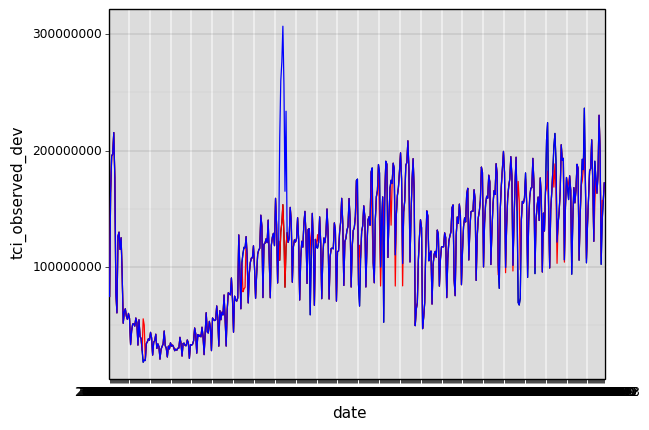

<ggplot: (8769684305769)>

In [435]:
import plotnine as p9
gg = (p9.ggplot(df_daily_update[df_daily_update.region_slug == 'mexicocity'],
                    p9.aes(x = 'date', y='tci_observed_dev', group = 'region_slug')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes(y = 'tci_smoothed_dev'), color = 'red')
 + p9.geom_line(p9.aes(y = 'tci_observed'), color = 'blue'))
gg

#### Long format

In [436]:
df_daily_update.head(1)

,date,region_slug,tci_observed,tcp_observed,tci_smoothed,tcp_smoothed,tci_observed_dev,tcp_observed_dev,tcp_smoothed_dev,tci_smoothed_dev
0,2020-07-15,aguascalientes,2544527,-10.189667,2544527.0,-10.189667,2544527,-10.189667,-10.189667,2544527.0


In [437]:
from siuba import *
df_update_long = (df_daily_update 
 >> gather('measure', 'value', _["tci_observed":"tci_smoothed_dev"])
)
df_update_long['type'] = 'TCP'
tci_exist = df_update_long['measure'].isin(['tci_observed',  'tci_smoothed', 
                                           'tci_observed_dev', 'tci_smoothed_dev'])
df_update_long['type'][tci_exist] = 'TCI'
#df_update_long.measure.unique()

/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [438]:
df_prev_long = pd.read_csv(f"/home/soniame/private/smooth/daily_daily_index_long-202105.csv", index_col=0)
df_prev_long = df_prev_long[df_prev_long.measure.isin(['tci_observed',  'tcp_observed', 'tci_cleaned', 'tcp_cleaned']) == False]

print(df_prev_long.measure.unique())

df_daily_long = pd.concat([df_prev_long, df_update_long])
print(df_daily_long.measure.unique())
#df_daily_long[(df_daily_long.measure == 'tci_observed') & 
#              (df_daily_long.date == '2020-05-29') &
#              (df_daily_long.region_slug == 'aguascalientes')]

['tci_cleaned_ls_4X' 'tci_cleaned_ls_20X' 'tci_cleaned_ls_10X'
 'tci_cleaned_ls_15X' 'tci_cleaned_ls_OFF' 'tci_cleaned_ls_MIX'
 'tcp_cleaned_ls_4X' 'tcp_cleaned_ls_20X' 'tcp_cleaned_ls_OFF'
 'tcp_cleaned_ls_MIX' 'pc_driven_miles__waze' 'workplace__goo']
['tci_cleaned_ls_4X' 'tci_cleaned_ls_20X' 'tci_cleaned_ls_10X'
 'tci_cleaned_ls_15X' 'tci_cleaned_ls_OFF' 'tci_cleaned_ls_MIX'
 'tcp_cleaned_ls_4X' 'tcp_cleaned_ls_20X' 'tcp_cleaned_ls_OFF'
 'tcp_cleaned_ls_MIX' 'pc_driven_miles__waze' 'workplace__goo'
 'tci_observed' 'tcp_observed' 'tci_smoothed' 'tcp_smoothed'
 'tci_observed_dev' 'tcp_observed_dev' 'tcp_smoothed_dev'
 'tci_smoothed_dev']


In [440]:
# saving the update
df_daily_long.to_csv(f"/home/soniame/private/smooth/daily_daily_index_long-{cm}.csv")

In [439]:
gg = (p9.ggplot(df_daily_long[df_daily_long.region_slug == 'country_argentina'],
                    p9.aes(x = 'date', y='value', 
                           colour = 'measure', group = 'measure')) 
+ p9.geom_line() )
#gg

In [441]:
#df_daily_long.head()
#(df_daily_long 
#>> group_by('measure', 'type')
#>> summarize(date_min = _.date.min(),
#             date_max = _.date.max(), 
#             n_obs = _.date.count())
#)

In [442]:
gg = (p9.ggplot(df_daily_long[(df_daily_long.region_slug == 'country_peru') & 
                              (df_daily_long.type == 'TCI') & 
                              (df_daily_long.date > '2020-08-01') &
                              (df_daily_long.measure.isin(['tci_observed_dev', 'tci_smoothed_dev']))],
                    p9.aes(x = 'date', y='value', 
                           colour = 'measure', group = 'measure')) 
 + p9.geom_line()
 + p9.facet_wrap('region_slug')
 + p9.theme(axis_text_x=p9.element_text(angle=90),
                figure_size=(10, 5) )
)
#gg

In [443]:
#df_daily_update.sort_values('date').date.unique()

#### Daily dev

In [63]:
#from src import utils
#conn = utils.connect_athena(path='../configs/athena.yaml')
#qry="""
#select 
#    region_slug, 
#    date(concat(cast(year as varchar), '-', 
#				cast(month as varchar), '-', 
#				cast(day as varchar))) as date,
#    observed as tci_dev, tcp as tcp_dev
#from spd_sdv_waze_corona.dev_daily_daily_index
#where region_type in ('country', 'city');
#"""
#df_daily_dev = pd.read_sql_query(qry, conn)

In [320]:
#df_daily_dev_long = (df_daily_dev 
#    >> gather('measure', 'value', _["tci_dev":"tcp_dev"]))
#print(df_daily_dev_long.shape)
#regions_in = list(set(df_daily_dev_long.region_slug.unique()) & set(df_daily_long.region_slug.unique()))
#df_daily_dev_long = df_daily_dev_long[df_daily_dev_long.region_slug.isin(regions_in)]
#df_daily_dev_long.shape
#df_daily_dev_long['type'] = 'TCP'
#tci_exist = df_daily_dev_long['measure'].isin(['tci_dev'])
#df_daily_dev_long['type'][tci_exist] = 'TCI'

In [76]:
#df_daily_long = pd.read_csv("/home/soniame/private/daily_daily_index_long.csv", index_col=0)
#df_daily_long.shape
#df_daily_long_new = pd.concat([df_daily_long, df_daily_dev_long], axis=0)
#df_daily_long_new.to_csv("/home/soniame/private/daily_daily_index_long-dev.csv")

### Weekly

#### Experiments of parameters

In [ ]:
df_list = list()
for k in range(7):
    file = ['ls1', 'ls4', 'ls10', 'ls15', 'ls20', 'ls100', 'lsmix'][k]
    print(file)
    metric = ['', '_ls_4X', '_ls_10X', '_ls_15X', '_ls_20X', '_ls_OFF', '_ls_MIX'][k]
    
    df = pd.read_csv(f"/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/weekly/weekly_weekly_index_max_{file}.csv")
    df = df[['week', 'days_num', 'date_min', 'region_slug', 
             'tci_observed', 'tcp_observed', 'tci_clean', 'tcp_clean']] \
        .rename(columns = {'tci_clean':f'tci_cleaned{metric}', 
                           'tcp_clean':f'tcp_cleaned{metric}'}) 
    print(df.shape)
    df_list.append(df)
    
from functools import reduce
df_union = reduce(lambda x, y: pd.merge(x, y, on = ['week', 'days_num', 'region_slug', 'date_min', 'tci_observed', 'tcp_observed']), df_list)
print(df_union.shape)
df_union.head(2)    

##### Long format experiments

In [ ]:
df_weekly = pd.read_csv("/home/soniame/private/weekly_weekly_index.csv")
df_weekly.head(2)

In [ ]:
df_weekly_long = (df_weekly 
 >> select('week', 'days_num', 'date_min', 'region_slug', 
           'tci_observed',  'tci_cleaned', 
           'tci_cleaned_ls_4X', 'tci_cleaned_ls_20X',
           'tci_cleaned_ls_10X', 'tci_cleaned_ls_15X',
           'tci_cleaned_ls_OFF', 'tci_cleaned_ls_MIX',
           'tcp_observed', 'tcp_cleaned', 
           'tcp_cleaned_ls_4X', 'tcp_cleaned_ls_20X', 
           'tci_cleaned_ls_10X', 'tci_cleaned_ls_15X',
           'tcp_cleaned_ls_OFF', 'tcp_cleaned_ls_MIX')
 >> gather('measure', 'value', _["tci_observed":"tcp_cleaned_ls_MIX"])
 >> mutate(type = 'TCP')
)
tci_exist = df_weekly_long['measure'].isin(['tci_observed',  'tci_cleaned', 
           'tci_cleaned_ls_4X', 'tci_cleaned_ls_20X', 
           'tci_cleaned_ls_10X', 'tci_cleaned_ls_15X',
           'tci_cleaned_ls_OFF', 'tci_cleaned_ls_MIX'])
df_weekly_long['type'][tci_exist] = 'TCI'

print(df_weekly_long.type.unique())
print(df_weekly_long.measure.unique())
head(df_weekly_long)

In [ ]:
#df_weekly_long.to_csv("/home/soniame/private/weekly_weekly_index_long-202105.csv")

#### Export to csv

In [ ]:
df_union.describe()

In [ ]:
print(df_union.week.max())
print(df_union.date_min.max())
df_union.head()

In [ ]:
df_union.to_csv("/home/soniame/private/weekly_weekly_index.csv", index=False)

In [ ]:
gg = (p9.ggplot(df_union[df_union.region_slug == 'kingston'],
                    p9.aes(x = 'week', y='tci_observed', group = 'region_slug')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes( y='tci_cleaned'), color = 'blue'))
#gg

#### Athena historic

In [346]:
update_historic = False

In [123]:
df_union_weekly = pd.read_csv("/home/soniame/private/smooth/weekly_weekly_index-202105.csv", index_col=0) \
    [['date_min', 'region_slug', 
      'tci_observed', 'tcp_observed', 
      'tci_cleaned_ls_20X', 'tcp_cleaned_ls_20X']] \
    .rename(columns = {'tci_cleaned_ls_20X':'tci_smoothed', 
                       'tcp_cleaned_ls_20X':'tcp_smoothed'}) 
#df_union_weekly.head(2)

import boto3
import awswrangler as wr
from src import utils
conn = utils.connect_athena(path='../configs/athena.yaml')

s3_path = "s3://iadbprod-public-stata-as-a-service/spd-sdv-omitnik-waze/corona"
if update_historic:
    res = wr.s3.to_parquet(
            df=df_union_weekly,
            path=f"{s3_path}/athena/prod/smooth/prod_daily_weekly_smooth_historical",
            dataset=True,
            database='spd_sdv_waze_corona',
            table='prod_daily_weekly_smooth_historical',
            mode="overwrite",
            boto3_session=boto3.Session(region_name="us-east-1"),
        )

#### Export update

In [444]:
# preview observation
df_prev = pd.read_sql_query(f"""
    select 
        date_min, region_slug, tci_observed, tcp_observed,  tci_smoothed, tcp_smoothed
    from spd_sdv_waze_corona.prod_daily_weekly_smooth_historical""", conn)

In [445]:
# update dates from prod
df_new = pd.read_csv(f"/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/weekly/weekly_weekly_index_prod_max_ls20-202106291106.csv")
df_new = df_new[df_new.date_min > df_prev.date_min.max()][['date_min', 'region_slug', 
                                        'tci_observed', 'tcp_observed', 
                                        'tci_clean', 'tcp_clean']] \
        .rename(columns = {'tci_clean':'tci_smoothed', 
                           'tcp_clean':'tcp_smoothed'})
df_weekly_prod = pd.concat([df_prev, df_new])
df_weekly_prod.head()

,date_min,region_slug,tci_observed,tcp_observed,tci_smoothed,tcp_smoothed
0,2020-03-09,aguascalientes,18414201,-0.072327,18414201.0,-0.072327
1,2020-03-16,aguascalientes,9578544,-48.020464,9578544.0,-48.020464
2,2020-03-23,aguascalientes,5471700,-70.306925,5471700.0,-70.306925
3,2020-03-30,aguascalientes,4701122,-74.488593,4701122.0,-74.488593
4,2020-04-06,aguascalientes,3838557,-79.169443,3838557.0,-79.169443


In [446]:
# update dates from dev
df_dev = pd.read_csv(f"/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/weekly/weekly_weekly_index_dev_max_ls20-202107021107.csv")
df_dev = df_dev[['date_min', 'region_slug', 
                'tci_observed', 'tcp_observed', 
                'tcp_clean', 'tci_clean']]  \
        .rename(columns = {'tci_clean':'tci_smoothed_dev', 
                           'tcp_clean':'tcp_smoothed_dev',
                           'tci_observed':'tci_observed_dev', 
                           'tcp_observed':'tcp_observed_dev'})
#df_dev.head()

In [447]:
print(df_weekly_prod.shape)
print(df_dev.shape)

df_weekly_update = df_weekly_prod.merge(df_dev)
#df_daily_update = df_daily_prod

(5503, 6)
(5330, 6)


In [448]:
df_weekly_update.to_csv(f"/home/soniame/private/smooth/weekly_index_index_update-{cm}.csv", index=False)
print(df_weekly_update.date_min.max())
print(df_prev.date_min.max())
print(df_new.date_min.min())
print(df_new.date_min.max())
print(df_dev.date_min.min())
print(df_dev.date_min.max())

2021-06-21
2021-05-17
2021-05-24
2021-06-21
2020-03-09
2021-06-28


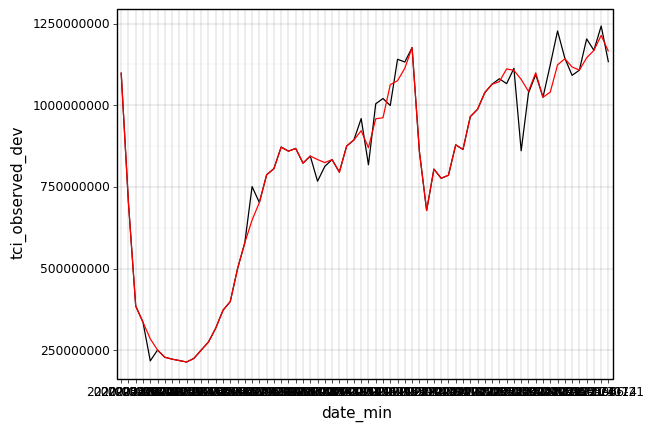

<ggplot: (8769704882125)>

In [449]:
import plotnine as p9
gg = (p9.ggplot(df_weekly_update[df_weekly_update.region_slug == 'mexicocity'],
                    p9.aes(x = 'date_min', y='tci_observed_dev', group = 'region_slug')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes(y = 'tci_smoothed_dev'), color = 'red')
# + p9.geom_line(p9.aes(y = 'tci_observed'), color = 'blue')
     )
gg

#### Long format 

In [450]:
df_weekly_update.head(1)

,date_min,region_slug,tci_observed,tcp_observed,tci_smoothed,tcp_smoothed,tci_observed_dev,tcp_observed_dev,tcp_smoothed_dev,tci_smoothed_dev
0,2020-03-09,aguascalientes,18414201,-0.072327,18414201.0,-0.072327,18414201,-3.5533,-3.5533,18414201.0


In [451]:
from siuba import *
df_update_long = (df_weekly_update 
 >> gather('measure', 'value', _["tci_observed":"tci_smoothed_dev"])
)

df_update_long
df_update_long['type'] = 'TCP'
tci_exist = df_update_long['measure'].isin(['tci_observed',  'tci_smoothed',
                                           'tci_observed_dev',  'tci_smoothed_dev'])
df_update_long['type'][tci_exist] = 'TCI'

/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [452]:
#df_update_long.head()
df_prev_long = pd.read_csv(f"/home/soniame/private/smooth/weekly_weekly_index_long-202105.csv", index_col=0)
df_prev_long = df_prev_long[df_prev_long.measure.isin(['tci_observed',  'tcp_observed', 'tci_cleaned', 'tcp_cleaned']) == False]
print(df_prev_long.measure.unique())

df_weekly_long = pd.concat([df_prev_long, df_update_long])
df_weekly_long.measure.unique()

['tci_cleaned_ls_4X' 'tci_cleaned_ls_20X' 'tci_cleaned_ls_10X'
 'tci_cleaned_ls_15X' 'tci_cleaned_ls_OFF' 'tci_cleaned_ls_MIX'
 'tcp_cleaned_ls_4X' 'tcp_cleaned_ls_20X' 'tcp_cleaned_ls_OFF'
 'tcp_cleaned_ls_MIX']


array(['tci_cleaned_ls_4X', 'tci_cleaned_ls_20X', 'tci_cleaned_ls_10X',
       'tci_cleaned_ls_15X', 'tci_cleaned_ls_OFF', 'tci_cleaned_ls_MIX',
       'tcp_cleaned_ls_4X', 'tcp_cleaned_ls_20X', 'tcp_cleaned_ls_OFF',
       'tcp_cleaned_ls_MIX', 'tci_observed', 'tcp_observed',
       'tci_smoothed', 'tcp_smoothed', 'tci_observed_dev',
       'tcp_observed_dev', 'tcp_smoothed_dev', 'tci_smoothed_dev'],
      dtype=object)

In [453]:
df_weekly_long.to_csv(f"/home/soniame/private/smooth/weekly_weekly_index_long-{cm}.csv")

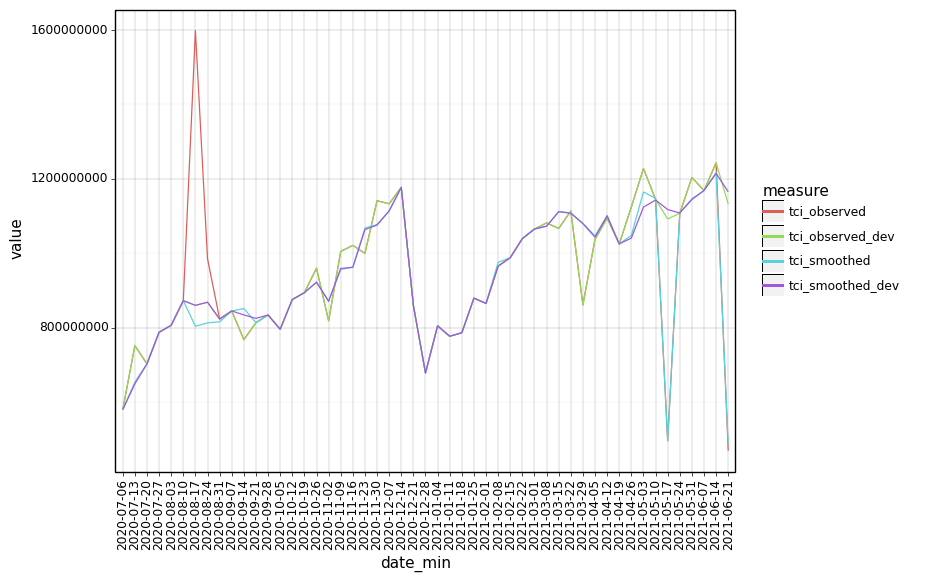

<ggplot: (8769706794317)>

In [454]:
gg = (p9.ggplot(df_weekly_long[(df_weekly_long.region_slug == 'mexicocity') & 
                              (df_weekly_long.type == 'TCI') & 
                              (df_weekly_long.date_min > '2020-07-01') &
                              (df_weekly_long.measure.isin(['tci_observed', 'tci_smoothed',
                                                           'tci_observed_dev', 'tci_smoothed_dev']))],
                    p9.aes(x = 'date_min', y='value', 
                           colour = 'measure', group = 'measure')) 
 + p9.geom_line()
 + p9.theme(axis_text_x=p9.element_text(angle=90),
                figure_size=(8, 6) )
)
gg

#### Weekly dev

In [16]:
from src import utils
conn = utils.connect_athena(path='../configs/athena.yaml')